In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000);

print(train_data.shape)
print(train_labels.shape)
word_index = reuters.get_word_index()

def vectorize(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.;
  return results

vectorized_train_data = vectorize(train_data)
vectorized_test_data = vectorize(test_data)
dropout_model = keras.Sequential([
    layers.Dense(units=128,
                 kernel_regularizer=keras.regularizers.l2(0.001),
                 activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=64,
                 kernel_regularizer=keras.regularizers.l2(0.001),
                 activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=46, activation="softmax")
])

dropout_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

(8982,)
(8982,)


In [ ]:
x_train = vectorized_train_data
y_train = keras.utils.to_categorical(train_labels).astype("float32")
x_test = vectorized_test_data
y_test = keras.utils.to_categorical(test_labels).astype("float32")

print(x_train.shape)
print(y_train.shape)

early_stopping_cb = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

checkpoint_cb = ModelCheckpoint(
    "reutersBest.keras",
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=False
)

dropout_history =dropout_model.fit(
    x_train,
    y_train,
    epochs=70,
    batch_size=512,
    validation_split=0.3,
    callbacks=[checkpoint_cb]
)



(8982, 10000)
(8982, 46)
Epoch 1/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.9466 - loss: 0.5304 - val_accuracy: 0.8056 - val_loss: 1.2111
Epoch 2/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9491 - loss: 0.5204 - val_accuracy: 0.8074 - val_loss: 1.2029
Epoch 3/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9473 - loss: 0.5202 - val_accuracy: 0.8108 - val_loss: 1.1918
Epoch 4/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9480 - loss: 0.5183 - val_accuracy: 0.8096 - val_loss: 1.1938
Epoch 5/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9494 - loss: 0.4995 - val_accuracy: 0.8119 - val_loss: 1.1987
Epoch 6/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9571 - loss: 0.4963 - val_accuracy: 0.8119 - val_loss: 1.2092
Epoch 7/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9536 - loss: 0.4984 - val_accuracy: 0.8074 - val_loss: 1.2096
Epoch 8/70
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9514 - loss: 0.

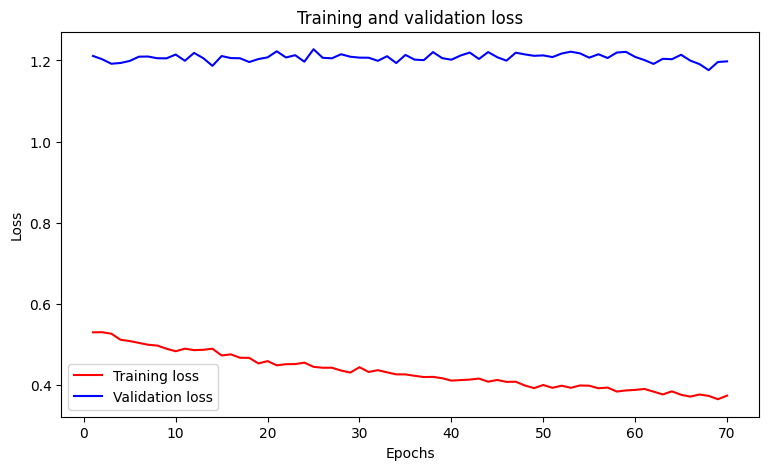

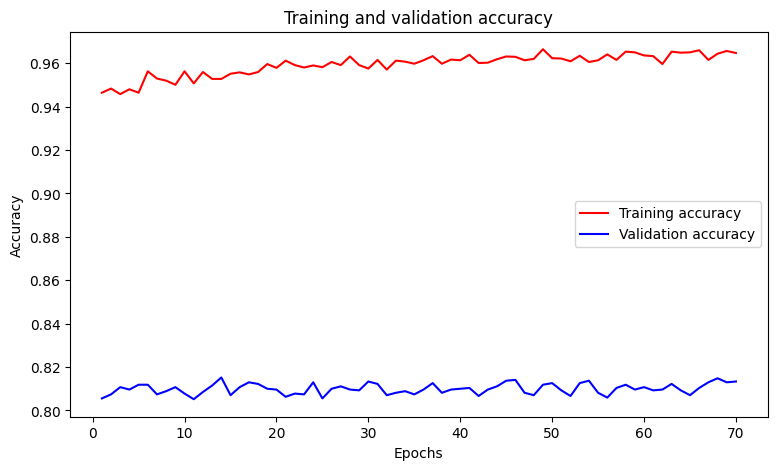

In [ ]:
loss = dropout_history.history["loss"]
val_loss = dropout_history.history["val_loss"]
accuracy = dropout_history.history["accuracy"]
val_accuracy = dropout_history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(9, 5))
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(9, 5))
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
final_best_model = keras.models.load_model("reutersBest.keras")
final_best_model.evaluate(x_test, y_test)

# Without one-hot-encoding (using sparse categorial crossentropy)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.2289 - loss: 3.4742 - val_accuracy: 0.5326 - val_loss: 2.2499
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.5150 - loss: 2.2634 - val_accuracy: 0.6216 - val_loss: 1.7133
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5724 - loss: 1.8600 - val_accuracy: 0.6811 - val_loss: 1.5114
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6197 - loss: 1.6132 - val_accuracy: 0.7034 - val_loss: 1.3812
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6513 - loss: 1.4875 - val_accuracy: 0.7040 - val_loss: 1.3130
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6695 - loss: 1.3986 - val_accuracy: 0.7062 - val_loss: 1.2631
Epoch 7/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6868 - loss: 1.3045 - val_accuracy: 0.7184 - val_loss: 1.2152
Epoch 8/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accurac

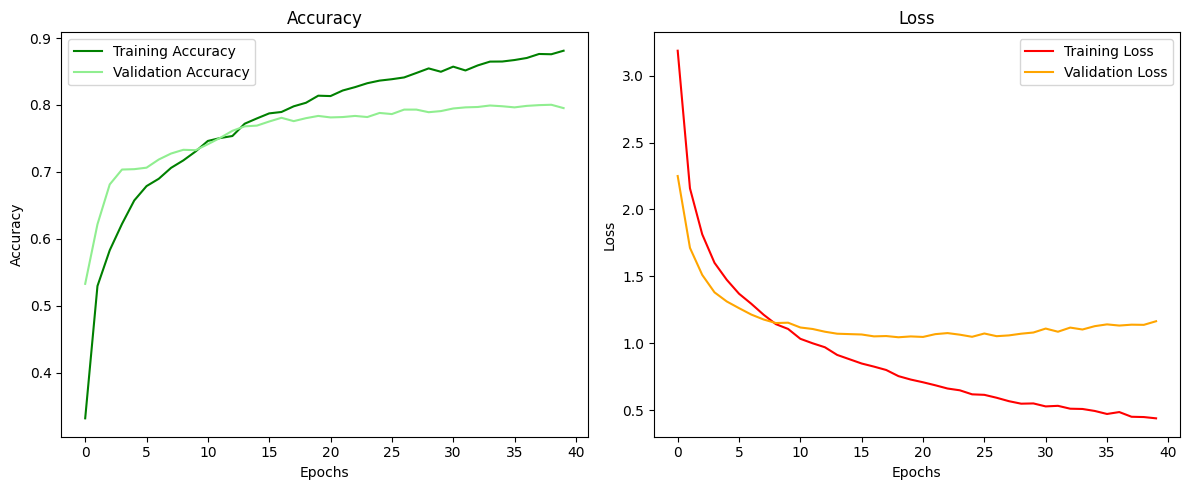

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import reuters
import matplotlib.pyplot as plt

# Load Reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Vectorize input sequences (multi-hot encoding)
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize(train_data)
x_test = vectorize(test_data)

# Use integer labels directly (no one-hot encoding)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# Build model
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(46, activation="softmax")
])

# Compile model
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train model
history = model.fit(
    x_train, y_train,
    epochs=40,
    batch_size=512,
    validation_split=0.2
)

# Evaluate model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)

# Predict
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Print first 10 predictions
print("Predicted classes:", predicted_classes[:10])
print("True labels:      ", y_test[:10])

# ----------- 📈 PLOTTING ----------------

# Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy", color="green")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="lightgreen")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss", color="red")
plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
